In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
results=pd.read_csv('F:/Data_Science/Tool_Wear/train.csv')

In [3]:
results

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,NaN
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


In [4]:
results.shape

(18, 7)

In [5]:
experiments=list()
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    experiment = pd.read_csv('F:/Data_Science/Tool_Wear/experiment_{}.csv'.format(exp))
    
    row = results[results['No'] == i]
    experiment['Target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    experiments.append(experiment)

df = pd.concat(experiments, ignore_index = True)
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,Target
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,End,1
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,End,1
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0,End,1
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,9.590000e-01,322.0,118.0,1.820000e-01,12.0,1.0,57.0,3.0,End,1


In [6]:
df.shape

(25286, 49)

In [7]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [8]:
df.isnull().sum()

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_Actua

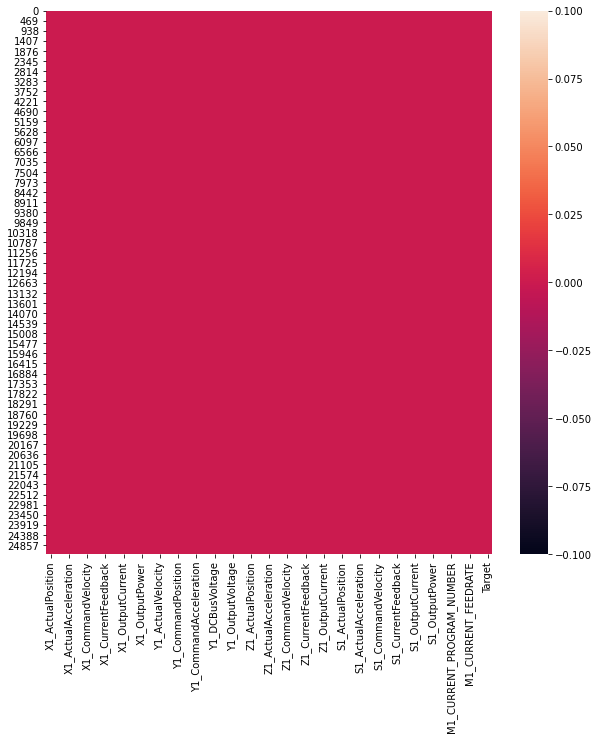

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

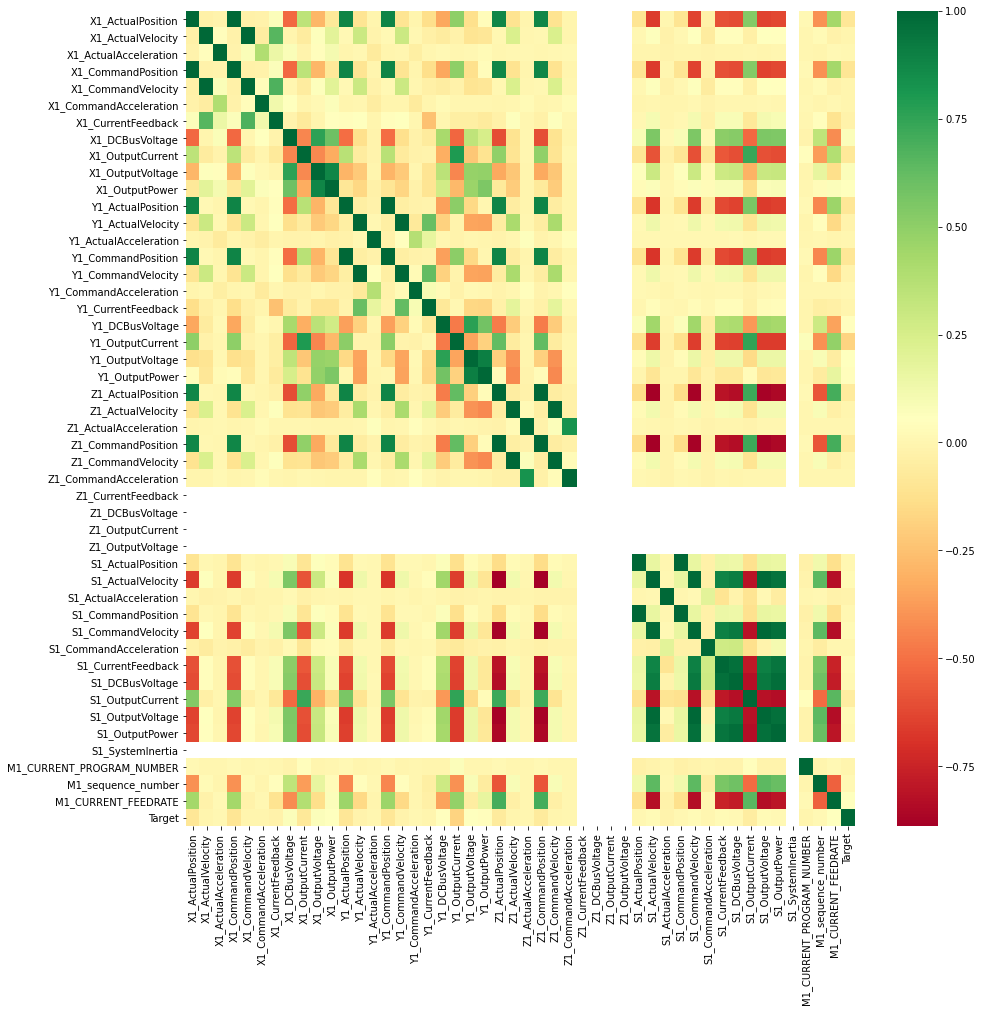

In [11]:
plt.figure(figsize = (15,15))
corr=df.corr()
sns.heatmap(corr, annot = False, cmap = "RdYlGn")
plt.show()

In [12]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

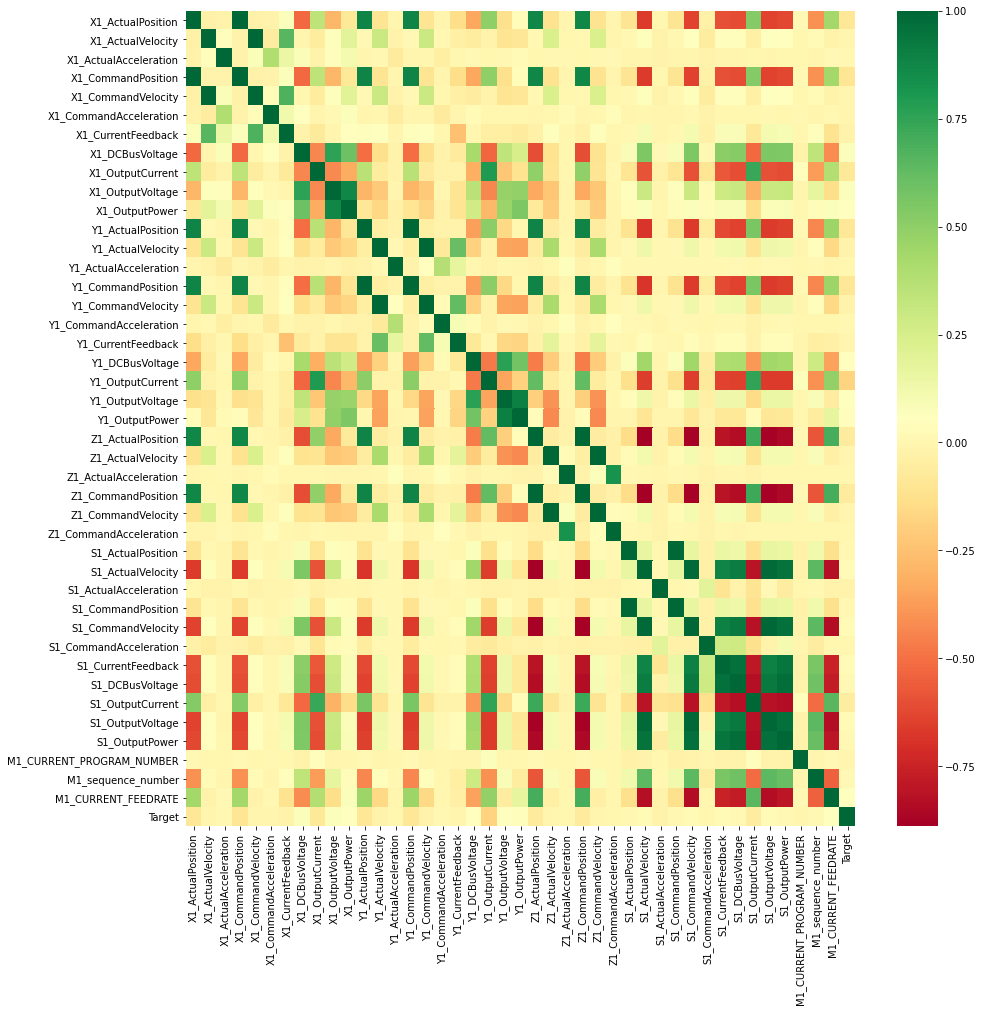

In [13]:
plt.figure(figsize = (15,15))
df1=df.copy()
df1.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia'],axis=1,inplace=True)
corr1=df1.corr()
sns.heatmap(corr1, annot = False, cmap = "RdYlGn")
plt.show()

In [39]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = list()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.append(colname)
    return col_corr

correlation(df1, 0.8)

['X1_CommandPosition',
 'X1_CommandVelocity',
 'X1_OutputPower',
 'Y1_ActualPosition',
 'Y1_ActualPosition',
 'Y1_CommandPosition',
 'Y1_CommandPosition',
 'Y1_CommandPosition',
 'Y1_CommandVelocity',
 'Y1_OutputPower',
 'Z1_ActualPosition',
 'Z1_ActualPosition',
 'Z1_ActualPosition',
 'Z1_ActualPosition',
 'Z1_CommandPosition',
 'Z1_CommandPosition',
 'Z1_CommandPosition',
 'Z1_CommandPosition',
 'Z1_CommandPosition',
 'Z1_CommandVelocity',
 'Z1_CommandAcceleration',
 'S1_ActualVelocity',
 'S1_ActualVelocity',
 'S1_CommandPosition',
 'S1_CommandVelocity',
 'S1_CommandVelocity',
 'S1_CommandVelocity',
 'S1_CurrentFeedback',
 'S1_CurrentFeedback',
 'S1_CurrentFeedback',
 'S1_CurrentFeedback',
 'S1_DCBusVoltage',
 'S1_DCBusVoltage',
 'S1_DCBusVoltage',
 'S1_DCBusVoltage',
 'S1_DCBusVoltage',
 'S1_OutputCurrent',
 'S1_OutputCurrent',
 'S1_OutputCurrent',
 'S1_OutputVoltage',
 'S1_OutputVoltage',
 'S1_OutputVoltage',
 'S1_OutputVoltage',
 'S1_OutputVoltage',
 'S1_OutputVoltage',
 'S1_Outpu

In [15]:
df.dtypes

X1_ActualPosition            float64
X1_ActualVelocity            float64
X1_ActualAcceleration        float64
X1_CommandPosition           float64
X1_CommandVelocity           float64
X1_CommandAcceleration       float64
X1_CurrentFeedback           float64
X1_DCBusVoltage              float64
X1_OutputCurrent             float64
X1_OutputVoltage             float64
X1_OutputPower               float64
Y1_ActualPosition            float64
Y1_ActualVelocity            float64
Y1_ActualAcceleration        float64
Y1_CommandPosition           float64
Y1_CommandVelocity           float64
Y1_CommandAcceleration       float64
Y1_CurrentFeedback           float64
Y1_DCBusVoltage              float64
Y1_OutputCurrent             float64
Y1_OutputVoltage             float64
Y1_OutputPower               float64
Z1_ActualPosition            float64
Z1_ActualVelocity            float64
Z1_ActualAcceleration        float64
Z1_CommandPosition           float64
Z1_CommandVelocity           float64
Z

In [16]:
X=df.drop(['Machining_Process','Target'],axis=1)
X

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,0.000000e+00,21.600,9.590000e-01,322.0,118.0,1.820000e-01,12.0,1.0,57.0,3.0


In [17]:
df.shape

(25286, 49)

In [18]:
y=df['Target']

In [19]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

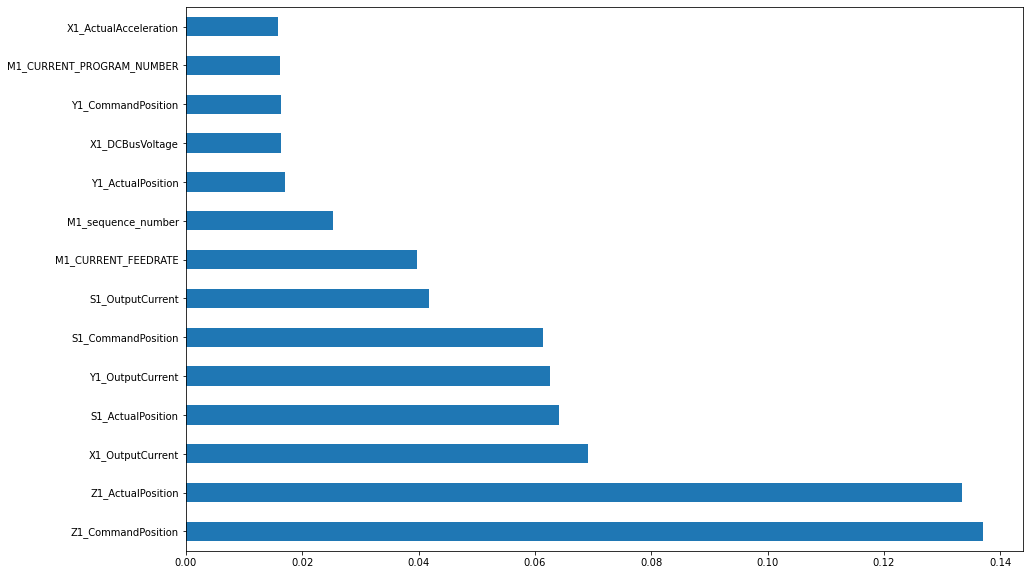

In [20]:
plt.figure(figsize=(15,10))
feature_imp=pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(14).plot(kind='barh')

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [23]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [24]:
svmodel=SVC()
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.7084783296425182

In [25]:
value=[]
algo=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=10)
    cv_score=cross_val_score(model,X_train,y_train,cv=cv).mean()
    print('CV_Score' + ' '+ str(model) +': '+ str(cv_score))
    value.append(cv_score)
    algo.append(name)

cross_val_score_model(SVC(),'SVC')
cross_val_score_model(KNeighborsClassifier(),'KNeighbors Classifier')
cross_val_score_model(DecisionTreeClassifier(),'DecisionTree Classifier')
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto'),'Logistic Regression')
cross_val_score_model(RandomForestClassifier(),'Random Forest Classifier')
cross_val_score_model(XGBClassifier(),'XGB Classifier')

CV_Score SVC(): 0.7087956127399282
CV_Score KNeighborsClassifier(): 0.8121915207762076
CV_Score DecisionTreeClassifier(): 0.9848977009069817
CV_Score LogisticRegression(solver='liblinear'): 0.5805526260282641
CV_Score RandomForestClassifier(): 0.9902130352246361
CV_Score XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None): 0.9929972579624552


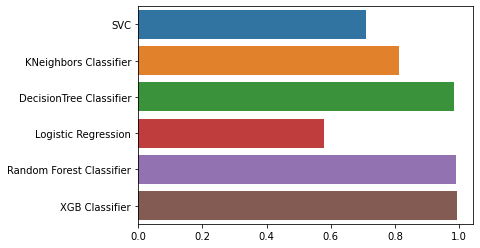

In [27]:
sns.barplot(x=value,y=algo)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_y_pred=xgb.predict(X_test)
score=accuracy_score(y_test,xgb_y_pred )
score

0.9935147105346409

In [40]:
df.iloc[15000]

X1_ActualPosition                     144
X1_ActualVelocity                   -2.92
X1_ActualAcceleration               -43.8
X1_CommandPosition                    144
X1_CommandVelocity                  -2.99
X1_CommandAcceleration              0.324
X1_CurrentFeedback                  -5.95
X1_DCBusVoltage                       0.1
X1_OutputCurrent                      327
X1_OutputVoltage                      9.8
X1_OutputPower                   0.000577
Y1_ActualPosition                    89.5
Y1_ActualVelocity                     0.3
Y1_ActualAcceleration                31.3
Y1_CommandPosition                   89.5
Y1_CommandVelocity                   0.29
Y1_CommandAcceleration               3.42
Y1_CurrentFeedback                    8.2
Y1_DCBusVoltage                     0.147
Y1_OutputCurrent                      325
Y1_OutputVoltage                     7.35
Y1_OutputPower                   0.000119
Z1_ActualPosition                    28.7
Z1_ActualVelocity                 

In [41]:
a=[[144,-2.92,-43.8,144,-2.99,0.324,-5.95,0.1,327,9.8,0.000577,89.5,0.3,31.3,89.5,0.29,3.42,8.2,0.147,325,7.35,0.000119,28.7,-0.025,-6.25,28.7,0,0,0,0,0,0,-1670,53.3,-16.4,-1670,53.3,-0.000000954,22.9,0.952,322,118,0.184,12,1,64,3]]
a=s.transform(a)
b=xgb.predict(a)
b

array([1], dtype=int64)